In [1]:

#CHAPTER 4 - Discovering interpretable features
# Perform the necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF,  PCA
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize, Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline


In [2]:
#NMF applied to Wikipedia articles
articles_df = pd.read_csv('Dados/Wikipedia articles/wikipedia-vectors.csv', sep=',', index_col=0)
articles = csr_matrix(articles_df.transpose())
titles = list(articles_df.columns)

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.57]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.49]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.36 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.38 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.47 0.   0.   0.  ]
 [0.   0.01 0.02 0.52 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.44 0.   0.  ]
 [0.   0.   0.   0.5  0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.58 0.   0.  ]
 [0.   0.   0.   0.53 0.01 0.01]
 [0.   0.4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [3]:
#NMF features of the Wikipedia articles

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway',:])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington',:])

0    0.003845
1    0.000000
2    0.000000
3    0.575660
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422343
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


In [4]:
#NMF reconstructs samples
NMF_Components = np.array([[1,0.5,0],[0.2,0.1,2.1]])
featuresValuesSample= np.array([[2,1]])
np.dot(featuresValuesSample,NMF_Components)

array([[2.2, 1.1, 2.1]])

In [5]:
#NMF learns topics of documents

# Create a DataFrame: components_df
f = open('Dados/Wikipedia articles/wikipedia-vocabulary-utf8.txt', 'r')
#print(f.read())
words = f.read().splitlines()

components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.627931
award      0.253154
starred    0.245306
role       0.211469
actress    0.186414
Name: 3, dtype: float64


In [6]:
#Which articles are similar to 'Cristiano Ronaldo'?

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


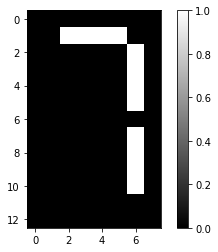

In [7]:
#Explore the LED digits dataset
lcd_df = pd.read_csv('Dados/lcd-digits.csv', sep=',',header = None)
lcd_df_samples =  lcd_df.to_numpy()
# Select the 0th row: digit
digit = lcd_df_samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


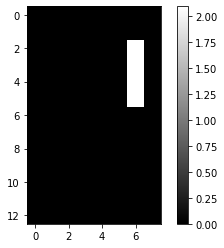

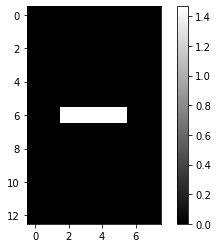

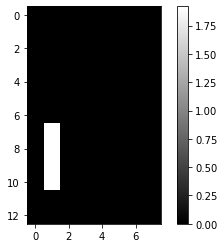

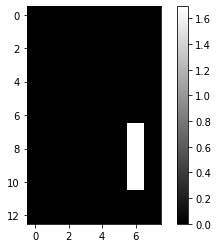

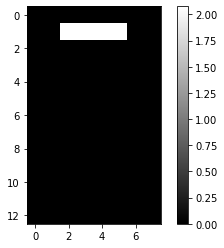

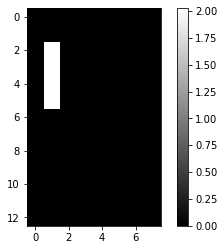

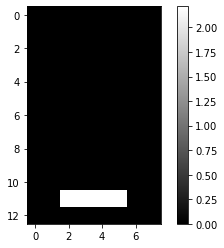

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37551667e-16]


In [8]:
#NMF learns the parts of images
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(lcd_df_samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

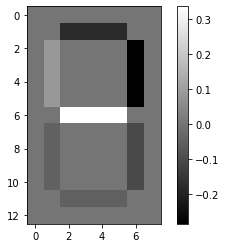

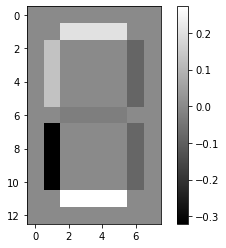

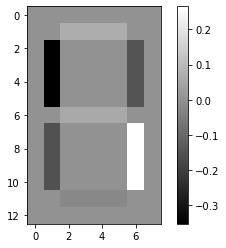

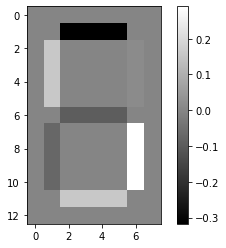

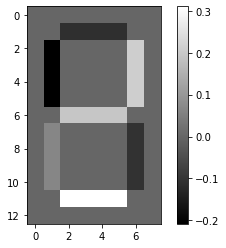

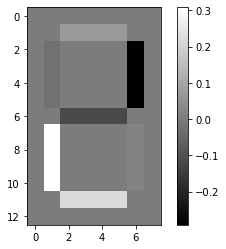

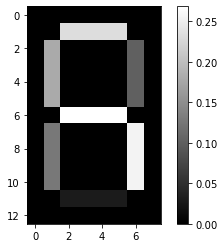

In [9]:
#PCA doesn't learn parts

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(lcd_df_samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

In [10]:
# #Recommend musical artists part 1
# artists_names_df = pd.read_csv('Dados/Musical artists/artists.csv', sep=',', header = None)
# artists_df = pd.read_csv('Dados/Musical artists/scrobbler-small-sample.csv', sep=',')

# # Create a MaxAbsScaler: scaler
# scaler = MaxAbsScaler()

# # Create an NMF model: nmf
# nmf = NMF(n_components=20)

# # Create a Normalizer: normalizer
# normalizer = Normalizer()

# # Create a pipeline: pipeline
# pipeline = make_pipeline(scaler,nmf,normalizer)

# # Apply fit_transform to artists: norm_features
# norm_features = pipeline.fit_transform(artists_df)


# #Recommend musical artists part 2

# # Create a DataFrame: df
# df = pd.DataFrame(norm_features, index=artists_names_df[:])

# # Select row of 'Bruce Springsteen': artist
# artist = df.loc['Bruce Springsteen']

# # Compute cosine similarities: similarities
# similarities = df.dot(artist)

# # Display those with highest cosine similarity
# print(similarities.nlargest())